In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix

# Introduction
In this exercise I try to predict what sorts of people are likely to have survived the Titanic ship sinking tragedy. This challenge comes from kaggle.com.

# Getting to know the data:

In [119]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
titanic = pd.DataFrame.append(train,test)

Test dataframe has one less column because it is missing the "Survived" data - these are the values I must predict.

In [120]:
print("Train shape: {}\nTest shape: {}\nTitanic shape: {}".format(train.shape,test.shape,titanic.shape))
titanic.head()

Train shape: (891, 11)
Test shape: (418, 10)
Titanic shape: (1309, 11)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


# Cleaning the data:
First let's see if there are any null values in the training set:

In [121]:
titanic.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

Of all the passengers in the dataset 263 have unknown ages, 1014 have unknown cabins, two have unknown embarked ports and one has an unknown fare. Let's investigate the missing ages first:

## Missing Ages

In [122]:
titanic[titanic['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1.0,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0,2677


I see a lot of these passengers have "Mr." or "Mrs." so maybe they are all adults. Let's look at the names of children to see if they have these prefixes.

In [123]:
titanic[titanic['Age']<14]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
8,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
11,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3,female,1,1.0,PP 9549
17,2.00,NaN,Q,29.1250,"Rice, Master. Eugene",1,3,male,4,0.0,382652
25,8.00,NaN,S,21.0750,"Palsson, Miss. Torborg Danira",1,3,female,3,0.0,349909
44,3.00,NaN,C,41.5792,"Laroche, Miss. Simonne Marie Anne Andree",2,2,female,1,1.0,SC/Paris 2123
51,7.00,NaN,S,39.6875,"Panula, Master. Juha Niilo",1,3,male,4,0.0,3101295
59,5.00,NaN,S,27.7500,"West, Miss. Constance Mirium",2,2,female,1,1.0,C.A. 34651
60,11.00,NaN,S,46.9000,"Goodwin, Master. William Frederick",2,3,male,5,0.0,CA 2144
64,4.00,NaN,S,27.9000,"Skoog, Master. Harald",2,3,male,3,0.0,347088


It appears that all children under the age of 14 except for one (PassengerId 732) have either "Miss." or "Master." in their name. At 14 years of age males are given the "Mr." prefix. Also, it appears that females keep their "Miss." prefix until marriage. Let's take a look at the number and average ages of each of these prefixes:

In [124]:
prefixes = ['Miss\.','Master\.','Mr\.','Mrs\.','Dr\.','Col\.','Rev\.','Mlle\.','Major\.','Ms\.']
prefix_names = ['Miss. ','Master. ','Mr. ','Mrs. ','Dr. ','Col. ','Rev. ','Mlle. ','Major. ','Ms. ']
num_prefixes = [titanic[titanic['Name'].str.contains(prefix)].shape[0] for prefix in prefixes]

[print("Number of {}: {}".format(prefix_names[prefix],num_prefixes[prefix])) for prefix in range(len(prefixes))]

Number of Miss. : 260
Number of Master. : 61
Number of Mr. : 757
Number of Mrs. : 197
Number of Dr. : 8
Number of Col. : 4
Number of Rev. : 8
Number of Mlle. : 2
Number of Major. : 2
Number of Ms. : 2


[None, None, None, None, None, None, None, None, None, None]

In [125]:
avg_ages = [titanic[titanic['Name'].str.contains(prefix)]['Age'].mean() for prefix in prefixes]

[print("{} Mean Age: {}".format(prefix_names[prefix],avg_ages[prefix])) for prefix in range(len(prefixes))]

Miss.  Mean Age: 21.774238095238097
Master.  Mean Age: 5.482641509433963
Mr.  Mean Age: 32.25215146299484
Mrs.  Mean Age: 36.99411764705882
Dr.  Mean Age: 43.57142857142857
Col.  Mean Age: 54.0
Rev.  Mean Age: 41.25
Mlle.  Mean Age: 24.0
Major.  Mean Age: 48.5
Ms.  Mean Age: 28.0


[None, None, None, None, None, None, None, None, None, None]

Notice the sum of all passengers with these prefixes is less than the total number of passengers. Thus, I'll add an 'Other' group to catch the remaining prefixes.

In [126]:
print('Number of passengers with prefixes: {}\nTotal number of passengers: {}'.format(sum(num_prefixes),titanic.shape[0]))

Number of passengers with prefixes: 1301
Total number of passengers: 1309


Let's see these passengers with unique prefixes in their names:

In [127]:
other_df = titanic[pd.DataFrame([titanic['Name'].str.contains(prefix) for prefix in prefixes]).sum()==0]
other_df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
31,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,1,male,0,0.0,PC 17601
370,24.0,B35,C,69.3000,"Aubart, Mme. Leontine Pauline",0,1,female,0,1.0,PC 17477
557,48.0,A16,C,39.6000,"Duff Gordon, Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",0,1,female,1,1.0,11755
600,49.0,A20,C,56.9292,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,1,male,1,1.0,PC 17485
746,70.0,B22,S,71.0000,"Crosby, Capt. Edward Gifford",1,1,male,1,0.0,WE/P 5735
760,33.0,B77,S,86.5000,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",0,1,female,0,1.0,110152
823,38.0,NaN,S,0.0000,"Reuchlin, Jonkheer. John George",0,1,male,0,0.0,19972
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758


Let's add the others and visualize the results:

In [128]:
prefix_names += ['Other']
num_prefixes += [other_df.shape[0]]
avg_ages += [other_df['Age'].mean()]

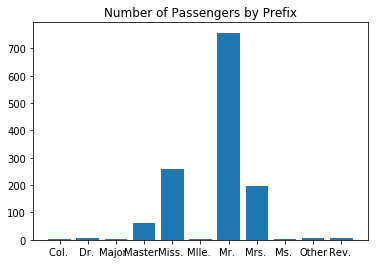

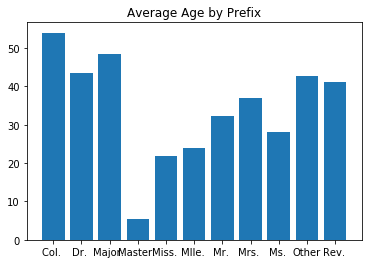

In [129]:
plt.bar(prefix_names,num_prefixes)
plt.title("Number of Passengers by Prefix")
plt.show()
plt.bar(prefix_names,avg_ages)
plt.title("Average Age by Prefix")
plt.show()

Let's add the missing ages into the age column based on the average age of passengers with the same prefix in their name.

In [130]:
avg_ages.remove(42.625)
age_table = pd.DataFrame([prefix_names,avg_ages])
age_table

,0,1,2,3,4,5,6,7,8,9,10
0,Miss.,Master.,Mr.,Mrs.,Dr.,Col.,Rev.,Mlle.,Major.,Ms.,Other
1,21.7742,5.48264,32.2522,36.9941,43.5714,54,41.25,24,48.5,28,None


In [131]:
age_table.iloc[0,0]

'Miss. '

In [132]:
def calc_age(df):
    if np.isnan(df['Age']):
        for i in range(10):
            if age_table.iloc[0,i] in df['Name']:
                return age_table.iloc[1,i]
            
    else:
        return df['Age']

titanic['Age'] = titanic.apply(calc_age, axis=1)

In [133]:
titanic.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,female,1,1.0,PC 17599
3,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,32.252151,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


## Missing Cabins

In [134]:
titanic[titanic['Cabin'].notnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
2,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,female,1,1.0,PC 17599
4,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
7,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
11,4.000000,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3,female,1,1.0,PP 9549
12,58.000000,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,1,female,0,1.0,113783
22,34.000000,D56,S,13.0000,"Beesley, Mr. Lawrence",0,2,male,0,1.0,248698
24,28.000000,A6,S,35.5000,"Sloper, Mr. William Thompson",0,1,male,0,1.0,113788
28,19.000000,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,1,male,3,0.0,19950
32,36.994118,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569


Only 22.5% of all passengers have a known Cabin number.

In [135]:
titanic[titanic['Cabin'].notnull()].shape[0]/titanic.shape[0]*100

22.536287242169596

It's interesting that over 86% of the known cabins belonged to first class passengers. I found out that this is because a first class passengers list was found on the body of one of the steward Herbert Cave.

In [136]:
g1 = titanic[['Cabin','Pclass']].groupby(['Pclass']).count()
print(g1)
print("\nPercentage of known cabins beloning to 1st class passengers: {}".format(256/(256+23+16)*100))

        Cabin
Pclass       
1         256
2          23
3          16

Percentage of known cabins beloning to 1st class passengers: 86.77966101694915


Let's make a new column of cabin sections. For passengers without sections we'll give the section 'N' for none. I'm grouping section G into F because there's only 5 passengers in section G and it is closest to F. There is one passenger in section T so I'm incuding this in the 'N' section.

In [137]:
# Make new column with Cabin number
titanic['Cabin_section'] = titanic.Cabin.str.extract('([A-Za-z]+)', expand=False).fillna('N')
titanic.loc[titanic['Cabin_section']=='G','Cabin_section'] = 'F'
titanic.loc[titanic['Cabin_section']=='T','Cabin_section'] = 'N'
# Drop original Cabin column
titanic.drop('Cabin', axis=1, inplace=True)

Let's see the survival rate of passengers based on their cabin section:

In [138]:
titanic[['Cabin_section','Survived']].groupby('Cabin_section').mean()

,Survived
Cabin_section,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.588235
N,0.299419


Here are the numbers of passnegers in each cabin section:

In [139]:
titanic['Cabin_section'].value_counts()

N    1015
C      94
B      65
D      46
E      41
F      26
A      22
Name: Cabin_section, dtype: int64

## Missing Embarkment Port
We'll add the two missing embarkment port passengers to the most common embarkment port.

In [140]:
titanic['Embarked'].value_counts().argmax()

'S'

Looks like 'S' is the most common embarkment port so we'll add the two unknown values to 'S'.

In [141]:
titanic.loc[titanic['Embarked'].isnull(),'Embarked'] = 'S'

## Missing Fare
For the missing fare we'll assign it as the average fare of similar passengers with reguards to sex and class. 

In [142]:
titanic.loc[titanic['Fare'].isnull()]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_section
PassengerId,,,,,,,,,,,
1044,60.5,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701,N


In [143]:
titanic[['Pclass','Sex','Fare']].groupby(['Sex','Pclass'],as_index=False).mean()

,Sex,Pclass,Fare
0,female,1,109.412385
1,female,2,23.234827
2,female,3,15.324250
3,male,1,69.888385
4,male,2,19.904946
5,male,3,12.415462


3rd class male passengers' fare averaged 12.42 so we'll assign this value to our one missing passenger:

In [144]:
titanic.loc[titanic['Fare'].isnull(),'Fare'] = 12.42

Let's make sure we have no more missing values:

In [145]:
titanic.isnull().sum()

Age                0
Embarked           0
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Cabin_section      0
dtype: int64

## Feature Generation
Let's generate some new features for our model to train on. Size of family would be a good feature based on Parch and SibSp, the number of parents/children and siblings/spouse respectively. We can drop the ticket column because there seems to be no correlation between ticket value and survival.

In [146]:
titanic.drop('Ticket', axis=1, inplace=True)

In [147]:
titanic['Family_size'] = titanic['Parch'] + titanic['SibSp'] + 1
titanic.drop(['Parch','SibSp'], axis=1, inplace=True)

In [148]:
titanic.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,Cabin_section,Family_size
PassengerId,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,N,2
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,1.0,C,2
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,N,1
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,C,2
5,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,N,1


Now let's make all the catagorical columns (Embarked, Name, Sex, Cabin_section) into nominal values:

In [149]:
embarked_map = {'S':0,'C':1,'Q':2}
sex_map = {'male':0,'female':1}
cabin_map = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'N':6}
titanic['Embarked'] = titanic['Embarked'].map(embarked_map)
titanic['Sex'] = titanic['Sex'].map(sex_map)
titanic['Cabin_section'] = titanic['Cabin_section'].map(cabin_map)

In [150]:
titanic.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,Cabin_section,Family_size
PassengerId,,,,,,,,,
1,22.0,0,7.2500,"Braund, Mr. Owen Harris",3,0,0.0,6,2
2,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,1.0,2,2
3,26.0,0,7.9250,"Heikkinen, Miss. Laina",3,1,1.0,6,1
4,35.0,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1.0,2,2
5,35.0,0,8.0500,"Allen, Mr. William Henry",3,0,0.0,6,1


For classifying the names lets use the prefixes:

In [151]:
titanic['Name'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [152]:
titanic.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,Cabin_section,Family_size
PassengerId,,,,,,,,,
1,22.0,0,7.2500,Mr,3,0,0.0,6,2
2,38.0,1,71.2833,Mrs,1,1,1.0,2,2
3,26.0,0,7.9250,Miss,3,1,1.0,6,1
4,35.0,0,53.1000,Mrs,1,1,1.0,2,2
5,35.0,0,8.0500,Mr,3,0,0.0,6,1


In [153]:
titanic['Name'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Sir           1
Don           1
Jonkheer      1
Capt          1
Countess      1
Dona          1
Mme           1
Lady          1
Name: Name, dtype: int64

Let's assign the less used prefixes to the more generally used ones:

In [154]:
titanic['Name'] = titanic['Name'].replace(['Lady', 'Countess', 'Dona','Mme'], 'Mrs')
titanic['Name'] = titanic['Name'].replace(['Ms','Mlle'], 'Miss')
titanic['Name'] = titanic['Name'].replace(['Rev','Dr','Col','Major','Capt','Don','Jonkheer','Sir'], 'Mr')

In [155]:
titanic.Name.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Name, dtype: int64

Now let's assign ordinal values to these:

In [156]:
name_map = {'Mr':0,'Mrs':1,'Miss':2,'Master':3}
titanic.Name = titanic.Name.map(name_map)

In [157]:
titanic.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,Cabin_section,Family_size
PassengerId,,,,,,,,,
1,22.0,0,7.2500,0,3,0,0.0,6,2
2,38.0,1,71.2833,1,1,1,1.0,2,2
3,26.0,0,7.9250,2,3,1,1.0,6,1
4,35.0,0,53.1000,1,1,1,1.0,2,2
5,35.0,0,8.0500,0,3,0,0.0,6,1


Ready for training

# Training

In [158]:
train = titanic.iloc[:891]
test = titanic.iloc[891:]
test.drop('Survived', axis=1, inplace=True)

In [159]:
pd.options.mode.chained_assignment = None
train.Survived = train.Survived.astype(np.int64)

I've decided to use a few different models and see how they perform.

In [160]:
split = int(train.shape[0]*0.8)

X = train.iloc[:split]
y = train.iloc[split:]

features = train.drop('Survived', axis=1).columns
target = 'Survived'

In [161]:
rfc = RandomForestClassifier()
rfc.fit(X[features],X[target])
rfc_pred = rfc.predict(y[features])
rfc_rmse = mean_squared_error(y['Survived'],rfc_pred)**0.5
rfc_cm = confusion_matrix(y.Survived, rfc_pred)
print(rfc_rmse,'\n',rfc_cm)

0.422813138065 
 [[100  15]
 [ 17  47]]


In [162]:
knc = KNeighborsClassifier()
knc.fit(X[features],X[target])
knc_pred = knc.predict(y[features])
knc_rmse = mean_squared_error(y['Survived'],knc_pred)**0.5
knc_cm = confusion_matrix(y.Survived, knc_pred)
print(knc_rmse,'\n',knc_cm)

0.484393302502 
 [[98 17]
 [25 39]]


In [163]:
svc = SVC()
svc.fit(X[features],X[target])
svc_pred = svc.predict(y[features])
svc_rmse = mean_squared_error(y['Survived'],svc_pred)**0.5
svc_cm = confusion_matrix(y.Survived, svc_pred)
print(svc_rmse,'\n',svc_cm)

0.466773065817 
 [[96 19]
 [20 44]]


In [164]:
lrc = LogisticRegression()
lrc.fit(X[features],X[target])
lrc_pred = lrc.predict(y[features])
lrc_rmse = mean_squared_error(y['Survived'],lrc_pred)**0.5
lrc_cm = confusion_matrix(y.Survived, lrc_pred)
print(lrc_rmse,'\n',lrc_cm)

0.373717546376 
 [[106   9]
 [ 16  48]]


In [165]:
gnb = GaussianNB()
gnb.fit(X[features],X[target])
gnb_pred = gnb.predict(y[features])
gnb_rmse = mean_squared_error(y['Survived'],gnb_pred)**0.5
gnb_cm = confusion_matrix(y.Survived, gnb_pred)
print(gnb_rmse,'\n',gnb_cm)

0.395505475317 
 [[98 17]
 [11 53]]


In [166]:
l = [rfc_cm,knc_cm,svc_cm,lrc_cm,gnb_cm]
ls = ['rfc','knc','svc','lrc','gnb']
for i in range(len(l)):
    accuracy = (l[i][0,0]+l[i][1,1])/179
    print("{} accuracy: {}".format(ls[i],format(accuracy*100,'0.2f')))

rfc accuracy: 82.12
knc accuracy: 76.54
svc accuracy: 78.21
lrc accuracy: 86.03
gnb accuracy: 84.36


Let's submit the three most accurate models and see how they do:

In [167]:
lrc_pred = lrc.predict(test[features])
submission_lrc = pd.DataFrame({'PassengerId':test.index,'Survived':lrc_pred})
submission_lrc.to_csv('submission_lrc.csv',index=False)

rfc_pred = rfc.predict(test[features])
submission_rfc = pd.DataFrame({'PassengerId':test.index,'Survived':rfc_pred})
submission_rfc.to_csv('submission_rfc.csv',index=False)

gnb_pred = rfc.predict(test[features])
submission_gnb = pd.DataFrame({'PassengerId':test.index,'Survived':gnb_pred})
submission_gnb.to_csv('submission_gnb.csv',index=False)


The lrc model gave an accuracy of 76.1%

The rfc model gave an accuracy of 77.0%

The gnb model gave an accuracy of 78.9%

Let's try using the mean of the predicted answers from these models as our final prediction instead.

In [168]:
knc_pred = knc.predict(test[features])
svc_pred = svc.predict(test[features])

In [169]:
predictions = pd.DataFrame({'rfc':rfc_pred,'knc':knc_pred,'svc':svc_pred,'lrc':lrc_pred,'gnb':gnb_pred})
predictions['final'] = predictions.mean(axis=1).round().astype(int)

In [172]:
submission_mean = pd.DataFrame({'PassengerId':test.index,'Survived':predictions['final']})
submission_mean.to_csv('submission_mean.csv',index=False)

The mean results model gave an accuracy of 75.6% which is lower than any of the individual models. Let's try using a weighted average of the model predictions based on each model's accuracy.

In [176]:
weights = pd.Series({'rfc':3,'knc':1,'svc':2,'lrc':5,'gnb':4}) # Weights are given according to accuracy - higher 
                                                               # accuracy models are given more weight. 
predictions.drop('final', axis=1, inplace=True)
predictions['final'] = (predictions.dot(weights)/15).round().astype(int)

In [174]:
submission_wm = pd.DataFrame({'PassengerId':test.index,'Survived':predictions['final']})
submission_wm.to_csv('submission_wm.csv', index=False)

The weighted mean solution resulted in a 78.5% accuracy which is an improvement over the regular mean but not as good as the regular gnb solution.  

Some ideas for future improvement are to use the weighted average of more models. Also, I could play with the weight values themselves. One way of doing this would be to add the predictions of each model to the dataset and then train and test a new model on this extra data.

Another idea is to cut the age and fare columns into ordinal bins like the other columns and see what affect this has.

Finally, hyper-parameter tuning would probably increase the models' accuracies as well.

In [181]:
pd.read_csv('test.csv').shape

(418, 11)